# **Import Libraries**

In [ ]:
import re
import pandas as pd
import math
import missingno as msno
from collections import Counter
import numpy as np
from scipy.spatial import distance
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.impute import KNNImputer
from numpy import isnan
import pylab
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from zipfile import ZipFile
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split ,GridSearchCV ,PredefinedSplit,RandomizedSearchCV,cross_validate
from sklearn.metrics import accuracy_score
from keras.preprocessing.sequence import pad_sequences
import pickle
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras import regularizers
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Connection to Kaggle**

In [ ]:
# download and unzip the dataset
!pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!kaggle datasets download -d ahmedsalamas/chatbot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/56.3k [00:00<?, ?B/s]
100% 56.3k/56.3k [00:00<00:00, 22.0MB/s]


# **Extract ZipFile(ChatBot)**

In [ ]:
zip = ZipFile('/content/chatbot.zip')
zip.extractall()
zip.close()

# **Read Csv File**

In [ ]:
dataSet=pd.read_csv("/content/paired_questions.csv")# Read csv file 

In [ ]:
# Display sample of our data
dataSet.head()

question_id                                      user_question  \
0            1  What are the references with noonan syndrome a...   
1            1  What are the references with noonan syndrome a...   
2            1  What are the references with noonan syndrome a...   
3            1  What are the references with noonan syndrome a...   
4            1  What are the references with noonan syndrome a...   

                                   database_question  judge_score  
0  What is (are) Polycystic ovary syndrome ? (Als...  1-Incorrect  
1  What causes Polycystic ovary syndrome ? (Also ...  1-Incorrect  
2                      What causes Noonan syndrome ?    2-Related  
3    What are the complications of Noonan syndrome ?    2-Related  
4                   How to prevent Noonan syndrome ?    2-Related

# **Describe the Types of each column in the dataset**

In [ ]:
dataSet.dtypes # the type of each column

question_id           int64
user_question        object
database_question    object
judge_score          object
dtype: object

# **Dataset Shape**

In [ ]:
dataSet.shape # Dataset Shape

(2479, 4)

# **Dataset Describe**

In [ ]:
dataSet.describe()

question_id
count  2479.000000
mean     51.393304
std      29.858339
min       1.000000
25%      26.000000
50%      50.000000
75%      77.000000
max     104.000000

# **1 - Data Cleaning :-**

We can check the quality of dataset by finding **Dublicated** and check **missing** items in our dataSet

In [ ]:
# Select all duplicate rows based on all columns
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = dataSet[dataSet.duplicated()]
 
print("Duplicate Rows :")
 
# Print the raw Dataframe
duplicate


Duplicate Rows :


question_id                                      user_question  \
60              3                             are they gluten free\t   
96              5   How much glucose is in my GlucaGen HypoKit ? ...   
112             6   Does Anesthesia given during a operation seve...   
134             7   Can a birth control called Ocella cause DVT? ...   
141             7   Can a birth control called Ocella cause DVT? ...   
...           ...                                                ...   
2403          101  How long has this non prescription drug been i...   
2406          101  How long has this non prescription drug been i...   
2433          103               What can cause white cells ti uprate   
2460          104  Can you please provide Glimepiride storage & a...   
2461          104  Can you please provide Glimepiride storage & a...   

                                      database_question  judge_score  
60    What is (are) Substance use - amphetamines ? (...    2-Related  
96    What is (are) Prediabetes ? (Also called: Impa...  1-Incorrect  
112   What is (are) Hip joint replacement ? (Also ca...  1-Incorrect  
134    What is (are) Deep vein thrombosis - discharge ?  1-Incorrect  
141   What to do for Painful menstrual periods ? (Al...  1-Incorrect  
...                                                 ...          ...  
2403  What causes What I need to know about Erectile...    2-Related  
2406  What to do for What I need to know about Erect...    2-Related  
2433  What to do for Pupil - white spots ? (Also cal...  1-Incorrect  
2460  What to do for Hypothermia ? (Also called: Low...  1-Incorrect  
2461  What to do for Hypothermia ? (Also called: Low...  1-Incorrect  

[163 rows x 4 columns]

In [ ]:
print('The Number Of dublicated Rows :- ') # the number of dublicated rows 
print(duplicate.shape[0])

The Number Of dublicated Rows :- 
163


#### **There are 163 rows dublicated in our dataset , so we need to drop them to clean our dataset .**

## **- Remove dublicated Data**

In [ ]:
duplicate=dataSet.drop_duplicates(keep = 'first',inplace=True) # Drop dublicated values 

In [ ]:
print('The shape of data After remove them:- ') # The number of dublicated rows After drop them
print(dataSet.shape)

The shape of data After remove them:- 
(2316, 4)


In [ ]:
print('The Number Of dublicated Rows :- ') # The number of dublicated rows 
duplicate = dataSet[dataSet.duplicated()]
print(duplicate.shape[0])

The Number Of dublicated Rows :- 
0


##### **- There are no dublicates in our dataset Now .**
##### **- The Shape of the dataset is ( 2316 , 4 ) After removing dublicates .**

## **- Missing Values**

In [ ]:
dataSet.isna().sum()  # here represent how much data are missing

question_id          0
user_question        0
database_question    0
judge_score          0
dtype: int64

#### **There are no NaNs in our data set .**

#**2 - Preprocessing**
Handle each **column** of our dataset

### **- Trim All columns to Remove any spaces**

In [ ]:
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

dataSet=trim_all_columns(dataSet) # here trim each column in the dataset

### **2.1 - Handling Judge Score Column :-**

#### **- Visualize Judge Score Column**

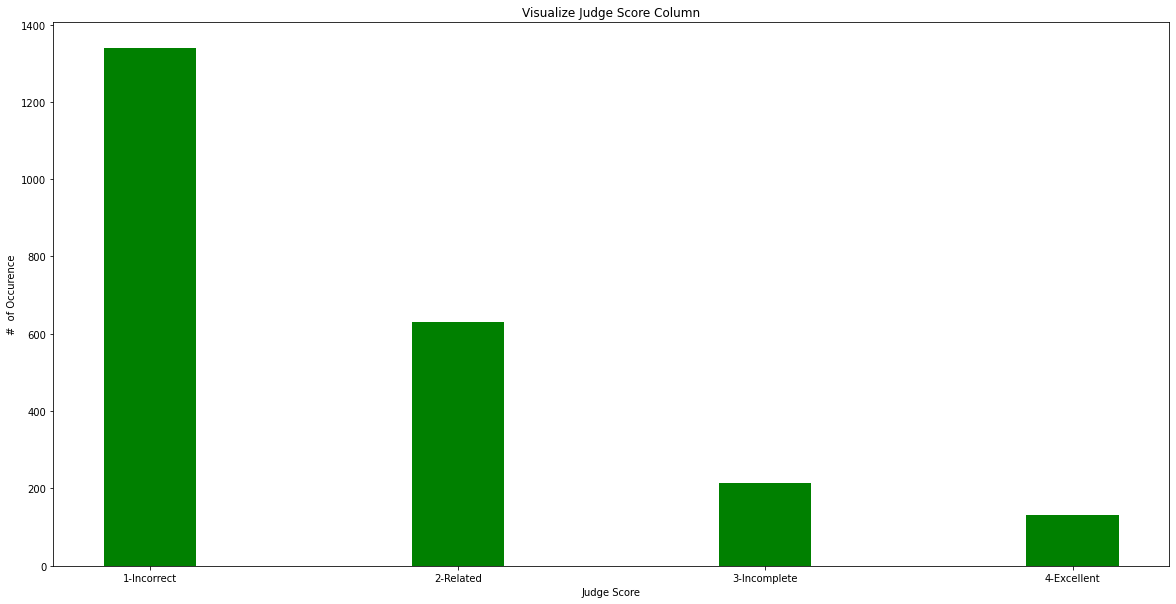

In [ ]:
judge_score=Counter(dataSet['judge_score'])
list_names=judge_score.keys()
list_scores=judge_score.values()

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(list_names, list_scores, color ='green',
        width = 0.3)
 
plt.xlabel("Judge Score")
plt.ylabel("#  of Occurence")
plt.title("Visualize Judge Score Column")
plt.show()
# graph represent Top year has achieved the most number sales


#### **Conclusion According to graph  :-**
 The data is biased to **1-Incorrect**   and the data **unbalance**

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'judge_score'.
dataSet['judge_score']= label_encoder.fit_transform(dataSet['judge_score'])
  
dataSet['judge_score'].unique()

array([0, 1, 2, 3])

#### **Now we convert each string to numerical number**

### **2.2 - Handling User Question Column :-**

#### **1 - Lower Casing**
**Lower casing** is a common text preprocessing technique. The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.

In [ ]:
dataSet.user_question = dataSet.user_question.str.lower()
dataSet.user_question.head()

0    what are the references with noonan syndrome a...
1    what are the references with noonan syndrome a...
2    what are the references with noonan syndrome a...
3    what are the references with noonan syndrome a...
4    what are the references with noonan syndrome a...
Name: user_question, dtype: object

#### **2 - Removal of Punctuations**
One another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

dataSet.user_question = dataSet.user_question.apply(lambda text: remove_punctuation(text))
dataSet.user_question.head()

0    what are the references with noonan syndrome a...
1    what are the references with noonan syndrome a...
2    what are the references with noonan syndrome a...
3    what are the references with noonan syndrome a...
4    what are the references with noonan syndrome a...
Name: user_question, dtype: object

####**3 - Removal of stopwords**

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.

These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataSet.user_question = dataSet.user_question.apply(lambda text: remove_stopwords(text))
dataSet.user_question.head()

0    references noonan syndrome polycystic renal di...
1    references noonan syndrome polycystic renal di...
2    references noonan syndrome polycystic renal di...
3    references noonan syndrome polycystic renal di...
4    references noonan syndrome polycystic renal di...
Name: user_question, dtype: object

#### **4 - Removal of Frequent words**

In the previos preprocessing step, we removed the stopwords based on language information. But say, if we have a domain specific corpus, we might also have some frequent words which are of not so much importance to us.

So this step is to remove the frequent words in the given corpus. If we use something like tfidf, this is automatically taken care of.

Let us get the most common words adn then remove them in the next step

In [ ]:
cnt = Counter()
for text in dataSet.user_question.values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('would', 403),
 ('know', 319),
 ('take', 309),
 ('please', 299),
 ('cause', 289),
 ('taking', 259),
 ('thank', 241),
 ('like', 236),
 ('could', 214),
 ('months', 211)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

dataSet.user_question = dataSet.user_question.apply(lambda text: remove_freqwords(text))
dataSet.user_question.head()

0    references noonan syndrome polycystic renal di...
1    references noonan syndrome polycystic renal di...
2    references noonan syndrome polycystic renal di...
3    references noonan syndrome polycystic renal di...
4    references noonan syndrome polycystic renal di...
Name: user_question, dtype: object

####**5 - Removal of Rare words**

This is very similar to previous preprocessing step but we will remove the rare words from the corpus.

In [ ]:
# Drop the two columns which are no more needed 

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

dataSet.user_question = dataSet.user_question.apply(lambda text: remove_rarewords(text))
dataSet.user_question.head()

0    references noonan syndrome polycystic renal di...
1    references noonan syndrome polycystic renal di...
2    references noonan syndrome polycystic renal di...
3    references noonan syndrome polycystic renal di...
4    references noonan syndrome polycystic renal di...
Name: user_question, dtype: object

#### **6 - Stemming**

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form (From Wikipedia)

For example, if there are two words in the corpus walks and walking, then stemming will stem the suffix to make them walk. But say in another example, we have two words console and consoling, the stemmer will remove the suffix and make them consol which is not a proper english word.

There are several type of stemming algorithms available and one of the famous one is porter stemmer which is widely used. We can use nltk package for the same.

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

dataSet.user_question = dataSet.user_question.apply(lambda text: stem_words(text))
dataSet.user_question.head()

0    refer noonan syndrom polycyst renal diseas
1    refer noonan syndrom polycyst renal diseas
2    refer noonan syndrom polycyst renal diseas
3    refer noonan syndrom polycyst renal diseas
4    refer noonan syndrom polycyst renal diseas
Name: user_question, dtype: object

We can see that words like private and propose have their e at the end chopped off due to stemming. This is not intented. What can we do fort hat? We can use Lemmatization in such cases.

Also this porter stemmer is for English language. If we are working with other languages, we can use snowball stemmer. The supported languages for snowball stemmer are

In [ ]:
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

#### **7 - Lemmatization**

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

As a result, this one is generally slower than stemming process. So depending on the speed requirement, we can choose to use either stemming or lemmatization.

Let us use the WordNetLemmatizer in nltk to lemmatize our sentences

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

dataSet.user_question = dataSet.user_question.apply(lambda text: lemmatize_words(text))
dataSet.user_question.head()

0    refer noonan syndrom polycyst renal diseas
1    refer noonan syndrom polycyst renal diseas
2    refer noonan syndrom polycyst renal diseas
3    refer noonan syndrom polycyst renal diseas
4    refer noonan syndrom polycyst renal diseas
Name: user_question, dtype: object

In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

dataSet.user_question = dataSet.user_question.apply(lambda text: lemmatize_words(text))
dataSet.user_question.head()

0    refer noonan syndrom polycyst renal diseas
1    refer noonan syndrom polycyst renal diseas
2    refer noonan syndrom polycyst renal diseas
3    refer noonan syndrom polycyst renal diseas
4    refer noonan syndrom polycyst renal diseas
Name: user_question, dtype: object

#### **8 - Removal of URLs**

Next preprocessing step is to remove any URLs present in the data. For example, if we are doing a twitter analysis, then there is a good chance that the tweet will have some URL in it. Probably we might need to remove them for our further analysis.

We can use the below code snippet to do tha

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
#    
dataSet.user_question = dataSet.user_question.apply(lambda text: remove_urls(text))
dataSet.user_question.head()   

0    refer noonan syndrom polycyst renal diseas
1    refer noonan syndrom polycyst renal diseas
2    refer noonan syndrom polycyst renal diseas
3    refer noonan syndrom polycyst renal diseas
4    refer noonan syndrom polycyst renal diseas
Name: user_question, dtype: object

#### **9 - Using TfidfVectorizer**

In [ ]:
# Preprocessing on text remove stop words , get 1000 max features and convert each string to lowercase .

user=TfidfVectorizer(stop_words='english',max_features = 1000,lowercase=True,use_idf=True )
user_question_tokens=user.fit_transform(dataSet.user_question)
user_question_tokens

<2316x770 sparse matrix of type '<class 'numpy.float64'>'
	with 28773 stored elements in Compressed Sparse Row format>

### **2.3 - Handling Database Question Column :-**

#### **1 - Lower Casing**
Lower casing is a common text preprocessing technique. The idea is to convert the input text into same casing format so that 'text', 'Text' and 'TEXT' are treated the same way.

In [ ]:
dataSet.database_question = dataSet.database_question.str.lower()
dataSet.database_question.head()

0    what is (are) polycystic ovary syndrome ? (als...
1    what causes polycystic ovary syndrome ? (also ...
2                        what causes noonan syndrome ?
3      what are the complications of noonan syndrome ?
4                     how to prevent noonan syndrome ?
Name: database_question, dtype: object

#### **2 - Removal of Punctuations**
One another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

In [ ]:
dataSet.database_question = dataSet.database_question.apply(lambda text: remove_punctuation(text))
dataSet.database_question.head()

0    what is are polycystic ovary syndrome  also ca...
1    what causes polycystic ovary syndrome  also ca...
2                         what causes noonan syndrome 
3       what are the complications of noonan syndrome 
4                      how to prevent noonan syndrome 
Name: database_question, dtype: object

####**3 - Removal of stopwords**

Stopwords are commonly occuring words in a language like 'the', 'a' and so on. They can be removed from the text most of the times, as they don't provide valuable information for downstream analysis. In cases like Part of Speech tagging, we should not remove them as provide very valuable information about the POS.

These stopword lists are already compiled for different languages and we can safely use them. For example, the stopword list for english language from the nltk package can be seen below.

In [ ]:
dataSet.database_question = dataSet.database_question.apply(lambda text: remove_stopwords(text))
dataSet.database_question.head()

0    polycystic ovary syndrome also called polycyst...
1    causes polycystic ovary syndrome also called p...
2                               causes noonan syndrome
3                        complications noonan syndrome
4                              prevent noonan syndrome
Name: database_question, dtype: object

#### **4 - Removal of Frequent words**

In the previos preprocessing step, we removed the stopwords based on language information. But say, if we have a domain specific corpus, we might also have some frequent words which are of not so much importance to us.

So this step is to remove the frequent words in the given corpus. If we use something like tfidf, this is automatically taken care of.

Let us get the most common words adn then remove them in the next step

In [ ]:
cnt = Counter()
for text in dataSet.database_question.values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('also', 1549),
 ('called', 1549),
 ('information', 457),
 ('syndrome', 408),
 ('disease', 254),
 ('causes', 246),
 ('diabetes', 217),
 ('children', 216),
 ('months', 206),
 ('milestones', 204)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

dataSet.database_question = dataSet.database_question.apply(lambda text: remove_freqwords(text))
dataSet.database_question.head()

0    polycystic ovary polycystic ovaries polycystic...
1    polycystic ovary polycystic ovaries polycystic...
2                                               noonan
3                                 complications noonan
4                                       prevent noonan
Name: database_question, dtype: object

####**5 - Removal of Rare words**

This is very similar to previous preprocessing step but we will remove the rare words from the corpus.

In [ ]:
dataSet.database_question = dataSet.database_question.apply(lambda text: remove_rarewords(text))
dataSet.database_question.head()

0    polycystic ovary polycystic ovaries polycystic...
1    polycystic ovary polycystic ovaries polycystic...
2                                               noonan
3                                 complications noonan
4                                       prevent noonan
Name: database_question, dtype: object

#### **6 - Stemming**

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form (From Wikipedia)

For example, if there are two words in the corpus walks and walking, then stemming will stem the suffix to make them walk. But say in another example, we have two words console and consoling, the stemmer will remove the suffix and make them consol which is not a proper english word.

There are several type of stemming algorithms available and one of the famous one is porter stemmer which is widely used. We can use nltk package for the same.

In [ ]:
dataSet.database_question = dataSet.database_question.apply(lambda text: stem_words(text))
dataSet.database_question.head()

0    polycyst ovari polycyst ovari polycyst ovari s...
1    polycyst ovari polycyst ovari polycyst ovari s...
2                                               noonan
3                                       complic noonan
4                                       prevent noonan
Name: database_question, dtype: object

We can see that words like private and propose have their e at the end chopped off due to stemming. This is not intented. What can we do fort hat? We can use Lemmatization in such cases.

Also this porter stemmer is for English language. If we are working with other languages, we can use snowball stemmer. The supported languages for snowball stemmer are

In [ ]:
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

#### **7 - Lemmatization**

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

As a result, this one is generally slower than stemming process. So depending on the speed requirement, we can choose to use either stemming or lemmatization.

Let us use the WordNetLemmatizer in nltk to lemmatize our sentences

In [ ]:
dataSet.database_question = dataSet.database_question.apply(lambda text: lemmatize_words(text))
dataSet.database_question.head()

0    polycyst ovari polycyst ovari polycyst ovari s...
1    polycyst ovari polycyst ovari polycyst ovari s...
2                                               noonan
3                                       complic noonan
4                                       prevent noonan
Name: database_question, dtype: object

In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

dataSet.database_question = dataSet.database_question.apply(lambda text: lemmatize_words(text))
dataSet.database_question.head()

0    polycyst ovari polycyst ovari polycyst ovari s...
1    polycyst ovari polycyst ovari polycyst ovari s...
2                                               noonan
3                                       complic noonan
4                                       prevent noonan
Name: database_question, dtype: object

#### **8 - Removal of URLs**

Next preprocessing step is to remove any URLs present in the data. For example, if we are doing a twitter analysis, then there is a good chance that the tweet will have some URL in it. Probably we might need to remove them for our further analysis.

We can use the below code snippet to do that

In [ ]:
dataSet.database_question = dataSet.database_question.apply(lambda text: remove_urls(text))
dataSet.database_question.head()    

0    polycyst ovari polycyst ovari polycyst ovari s...
1    polycyst ovari polycyst ovari polycyst ovari s...
2                                               noonan
3                                       complic noonan
4                                       prevent noonan
Name: database_question, dtype: object

#### **9 - Using TfidfVectorizer**

In [ ]:
# Preprocessing on text remove stop words , get 1000 max features and convert each string to lowercase .

database=TfidfVectorizer(stop_words='english',max_features = 1000,lowercase=True ,use_idf=True)
database_question_tokens=database.fit_transform(dataSet.database_question)
#print("Feature Names n",database.get_feature_names_out())


# **3 - Prepare to Train Model**
We Will try **different** models 

### **3.1 Concatenate two column**

In [ ]:
print(user_question_tokens.shape)
print(database_question_tokens.shape)

(2316, 770)
(2316, 1000)


In [ ]:
appended = hstack([user_question_tokens, database_question_tokens], format='csr')
appended.shape

(2316, 1770)

## **3. 2 Split Train and Test**
Train **0 .75** and Test **0.25**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(appended,  dataSet['judge_score'], test_size = 0.25,train_size =0.75, random_state=3,shuffle=True)
X=appended
Y=dataSet['judge_score']

In [ ]:
X_train.shape

(1737, 1770)

In [ ]:
Y_test

1940    1
2017    1
496     0
1296    0
511     0
       ..
2096    0
1715    1
1724    0
1256    0
1305    0
Name: judge_score, Length: 579, dtype: int64

# **3.3 Models**

# **Regression Models**

### **- Linear Regression Model Using ( TfidfVectorizer )**
 By Combine two strings as one string .

In [ ]:
# Splitting the data into training and testing data
regr = LinearRegression()
regr.fit(X_train, Y_train)
predictions = regr.predict(X_test)
r2 = r2_score(Y_test, predictions)
rmse = mean_squared_error(Y_test, predictions, squared=False)

print('The rmse is :   ', rmse)

# calculate MAE
error = mae(Y_test, predictions)
  
# display
print("Mean absolute error : " + str(error))


The rmse is :    2.456470234383996
Mean absolute error : 0.5724639245547725


**Conclusion Using ( TfidfVectorizer ) :-**

**- RMSE** :-  2.45

**- MAE** :-  0.57

In [ ]:
# save the model to disk
filename = 'regression_model.sav'
pickle.dump(regr, open(filename, 'wb'))

# **Test Model (One Sample For Regression)**

In [ ]:
q1="	Re:NDC# 0115-0672-50 Zolmitriptan tabkets 5mg. I have celiac disease & need to know if these contain gluten, Thank you!"
q2="How should Zolmitriptan be used and what is the dosage ?"

In [ ]:
user_question_tokens=user.transform([q1])
database_question_tokens=database.transform([q2])
Test = hstack((user_question_tokens, database_question_tokens))
Test.shape

(1, 1770)

In [ ]:
pred= regr.predict(Test)
pred

array([1.40237798])

In [ ]:
pickle.dump(pred, open('model.pkl', 'wb'))


### **- Linear Regression Using ( Cosine Simliarty and Word2vec )**

In [ ]:

# Word to Vec
def word2vec(word):  
    # count the characters in word
    cw = Counter(word)
    # precomputes a set of the different characters
    sw = set(cw)
    # precomputes the "length" of the word vector
    lw = sqrt(sum(c*c for c in cw.values()))

    # return a tuple
    return cw, sw, lw

# Cos Distance 
def cosdis(v1, v2):
    # which characters are common to the two words?
    common = v1[1].intersection(v2[1])
    # by definition of cosine distance we have
    if(v1[2]!=0 and v2[2]!=0):
      return sum(v1[0][ch]*v2[0][ch] for ch in common)/v1[2]/v2[2]
    return 0

################### < Apply Cosine Simliarity > ###################

simliarity=[]
for i in range (len(dataSet["user_question"])): 
  va = word2vec(dataSet["user_question"].iloc[i]) 
  vb = word2vec(dataSet["database_question"].iloc[i])
  simliarity.append(cosdis(va,vb))
  

In [ ]:


# Splitting the data into training and testing data
X_train_simliarity, X_test_simliarity, Y_train_simliarity, Y_test_simliarity = train_test_split(np.array(simliarity).reshape(-1, 1),  dataSet['judge_score'], test_size = 0.25,train_size =0.75, random_state=3,shuffle=True)

###

regr = LinearRegression()
regr.fit(X_train_simliarity, Y_train_simliarity)
predictions_simliarity = regr.predict(X_test_simliarity)
rmse = mean_squared_error(Y_test_simliarity, predictions_simliarity, squared=False)

print('The rmse is : ', rmse)

# calculate MAE
error = mae(Y_test_simliarity, predictions_simliarity)
  
# display
print("Mean absolute error : " + str(error))    

The rmse is :  0.9100288056723314
Mean absolute error : 0.7490736147157222


**Conclusion Using ( Cosine Simliarity ) :-**

**- RMSE** :-  0.91

**- MAE** :-  0.74

### **- Linear Regression Using ( Jaccard Similarity  )**

In [ ]:
def jaccard_similarity(list1, list2): 
	intersection = set(list1).intersection(set(list2))
	union = set(list1).union(set(list2))
	if len(union)>0:
		return float(len(intersection) / len(union))
	else: return 0.0

simliarity=[]
for i in range (len(dataSet["user_question"])): 
  simliarity.append(jaccard_similarity(dataSet["user_question"].iloc[i],dataSet["database_question"].iloc[i]))


In [ ]:
# Splitting the data into training and testing data
X_train_simliarity, X_test_simliarity, Y_train_simliarity, Y_test_simliarity = train_test_split(np.array(simliarity).reshape(-1, 1),  dataSet['judge_score'], test_size = 0.25,train_size =0.75, random_state=3,shuffle=True)

###

regr = LinearRegression()
regr.fit(X_train_simliarity, Y_train_simliarity)
predictions_simliarity = regr.predict(X_test_simliarity)
rmse = mean_squared_error(Y_test_simliarity, predictions_simliarity, squared=False)

print('The rmse is : ', rmse)

# calculate MAE
error = mae(Y_test_simliarity, predictions_simliarity)
  
# display
print("Mean absolute error : " + str(error)) 

The rmse is :  0.9072746622320846
Mean absolute error : 0.7484961716035265


**Conclusion Using ( Jaccard Similarity ) :-**

**- RMSE** :-  0.90

**- MAE** :-  0.74

### **( SVR ) Lets implement models using different tyes of kernel (Linear, Polynomial & RBF)**

## **Linear kernel**

In [ ]:
grd = GridSearchCV(estimator=SVR(kernel='linear'),
                       param_grid={'C': [0.1, 1, 100],
                                   'epsilon': [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],},
                       cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [ ]:
grid_result = grd.fit(appended,  dataSet['judge_score'],)
best_params = grid_result.best_params_
best_svr = SVR(kernel='linear', C=best_params["C"], epsilon=best_params["epsilon"], coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

scoring = {
               'abs_error': 'neg_mean_absolute_error',
               'squared_error': 'neg_mean_squared_error'}

scores = cross_validate(best_svr, appended, dataSet['judge_score'], cv=5, scoring=scoring, return_train_score=True)
scoring = {'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}

scores = cross_validate(best_svr, appended, dataSet['judge_score'], cv=5, scoring=scoring, return_train_score=True)
LMAE=abs(scores['test_abs_error'].mean())
LRMSE=math.sqrt(abs(scores['test_squared_error'].mean()))

print('MAE of Linear Kernel = ', LMAE)
print('RMSE of Linear kernel = ', LRMSE)


MAE of Linear Kernel =  0.6992639897822374
RMSE of Linear kernel =  0.8577044563438174


## **Polynomial Kernel**

In [ ]:
gsc = GridSearchCV(
    estimator=SVR(kernel='poly'),
    param_grid={
        'C': [0.1, 1, 100],
        'epsilon': [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
        'degree': [2, 3, 4],
        'coef0': [0.1, 0.01, 0.001, 0.0001]},
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [ ]:
grid_result = gsc.fit(appended,  dataSet['judge_score'],)
best_params = grid_result.best_params_
best_svr = SVR(kernel='poly', C=best_params["C"], epsilon=best_params["epsilon"], coef0=best_params["coef0"],
               degree=best_params["degree"], shrinking=True,
               tol=0.001, cache_size=200, verbose=False, max_iter=-1)

scoring = {
    'abs_error': 'neg_mean_absolute_error',
    'squared_error': 'neg_mean_squared_error'}

scores = cross_validate(best_svr,appended, dataSet['judge_score'], cv=5, scoring=scoring, return_train_score=True)
PMAE=abs(scores['test_abs_error'].mean())
PRMSE=math.sqrt(abs(scores['test_squared_error'].mean()))    
print('MAE of Polynomial Kernel = ', PMAE)
print('RMSE of Polinomial Kernel = ', PRMSE)  

MAE of Polynomial Kernel =  0.715367573861688
RMSE of Polinomial Kernel =  0.8622321830904075


##**RBF Kernel**


In [ ]:
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100],
            'epsilon': [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,],
            'gamma': [ 0.001, 0.005, 0.1, 1]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [ ]:
grid_result = gsc.fit(appended, dataSet['judge_score'])
best_params = grid_result.best_params_
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)
scoring = {'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}
scores = cross_validate(best_svr,appended, dataSet['judge_score'], cv=5, scoring=scoring, return_train_score=True)
MAE=abs(scores['test_abs_error'].mean())
RMSE=math.sqrt(abs(scores['test_squared_error'].mean()))
print('MAE of RBF Kernel = ', MAE)
print('RMSE of RBF Kernel = ', RMSE)

MAE of RBF Kernel =  0.6991093849096094
RMSE of RBF Kernel =  0.8561741982417984


# **Classification Models**

### **- SVM Model**

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
gridSVM = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
gridSVM.fit(X_train, Y_train) 
 
# print best parameter after tuning 
print(gridSVM.best_params_) 
grid_predictions = gridSVM.predict(X_test) 
   
# print classification report 
print(classification_report(Y_test, grid_predictions)) 


Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       327
           1       0.62      0.77      0.69       155
           2       0.30      0.05      0.09        59
           3       0.60      0.39      0.48        38

    accuracy                           0.77       579
   macro avg       0.60      0.54      0.54       579
weighted avg       0.73      0.77      0.74       579



**Conclusion Of SVNM MODEL :-**

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       327
           1       0.61      0.76      0.68       155
           2       0.40      0.07      0.12        59
           3       0.60      0.39      0.48        38

    accuracy      0.76       
    macro avg     0.62     
    weighted avg  0.73      

### **Logistic Regression Model**

In [ ]:
# Grid search cross validation
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='lbfgs')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,Y_train)

# print best parameter after tuning 
print(logreg_cv.best_params_) 
grid_predictions = logreg_cv.predict(X_test) 
   
# print classification report 
print(classification_report(Y_test, grid_predictions)) 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 1.0, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       327
           1       0.61      0.69      0.65       155
           2       0.33      0.07      0.11        59
           3       0.60      0.32      0.41        38

    accuracy                           0.75       579
   macro avg       0.59      0.51      0.52       579
weighted avg       0.71      0.75      0.71       579



**Conclusion Of LogisticRegression MODEL :-**

**Tuned hpyerparameters (best parameters) :**  {'C': 1.0, 'penalty': 'l2'}

**Accuracy** : 0.72

# **Test Model (One Sample For Deployment Classification)**

In [ ]:
q1="	Re:NDC# 0115-0672-50 Zolmitriptan tabkets 5mg. I have celiac disease & need to know if these contain gluten, Thank you!"
q2="How should Zolmitriptan be used and what is the dosage ?"

In [ ]:
user_question_tokens=user.transform([q1])
database_question_tokens=database.transform([q2])

In [ ]:
appendedTest = hstack((user_question_tokens, database_question_tokens))
appendedTest.shape

(1, 1770)

In [ ]:
Y_predTest=logreg_cv.predict(appendedTest)
if(Y_predTest[0]==0):
  print("Incorrect")
elif (Y_predTest[0]==1):
  print("Related")
elif (Y_predTest[0]==2):
  print("Incomplete")
elif (Y_predTest[0]==3):
  print("Excellent")

Incorrect


# **Save Model**

In [ ]:
with open('user_question_vectorizer.pk', 'wb') as fin:
     pickle.dump(user, fin)

with open('database_question_vectorizer.pk', 'wb') as fin:
     pickle.dump(database, fin)     

In [ ]:
# save the model to disk
filename = 'Logistic_model.sav'
pickle.dump(logreg_cv, open(filename, 'wb'))

# **Load Model**

In [ ]:
user_question_vectorizer = pd.read_pickle('/content/user_question_vectorizer.pk')
database_question_vectorizer = pd.read_pickle('/content/database_question_vectorizer.pk')

q1="	Re:NDC# 0115-0672-50 Zolmitriptan tabkets 5mg. I have celiac disease & need to know if these contain gluten, Thank you!"
q2="How should Zolmitriptan be used and what is the dosage ?"


In [ ]:
user=user_question_vectorizer.transform([q1])
database=database_question_vectorizer.transform([q2])
Test = hstack((user, database))
Test.shape

(1, 1770)

In [ ]:
Y_predTest=logreg_cv.predict(Test)
if(Y_predTest[0]==0):
  print("Incorrect")
elif (Y_predTest[0]==1):
  print("Related")
elif (Y_predTest[0]==2):
  print("Incomplete")
elif (Y_predTest[0]==3):
  print("Excellent")

Incorrect


# **Deployment (WebSite )**
https://chat-queens.herokuapp.com/#/